It is convention for most geographic APIs to store coordinates in geographic coordinate systems, and then reproject them to spherical mercator (epsg:3857) when they need to be displayed. Even when the map is being displayed, all the points are labelled as latitude longitude. The issue is that the closer we move to the poles, the less the mercator "meter" units are actually meters, because sphere.

For our implementation, we know the following to be required:
1. The model only accepts rectangular regions (we can pad the borders, but preferably not)
1. Pulling data from earth engine requires us to define the region in geographic crs EPSG:4326
1. We have to display all our precomputed region data on web mercator, with the shape of each region needing to be tilable.
1. If we use web mercator as is standard, we are unable to display the poles as the distortion moves to infinity.
1. We cannot do any area/distance calculations in web mercator.

With that in mind, we make the decision to not give a shit about mercator's distortions, and divide it into square grids, and then reprojecting them into epsg:4326. The resultant will be some funky pillow shaped polygon, but that's okay. Using those funny shapes we can just pad the rectangle with some incredibly large negative value, and we will get a consistent sized rectangle which we pass into the neural network.

In [18]:
import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt

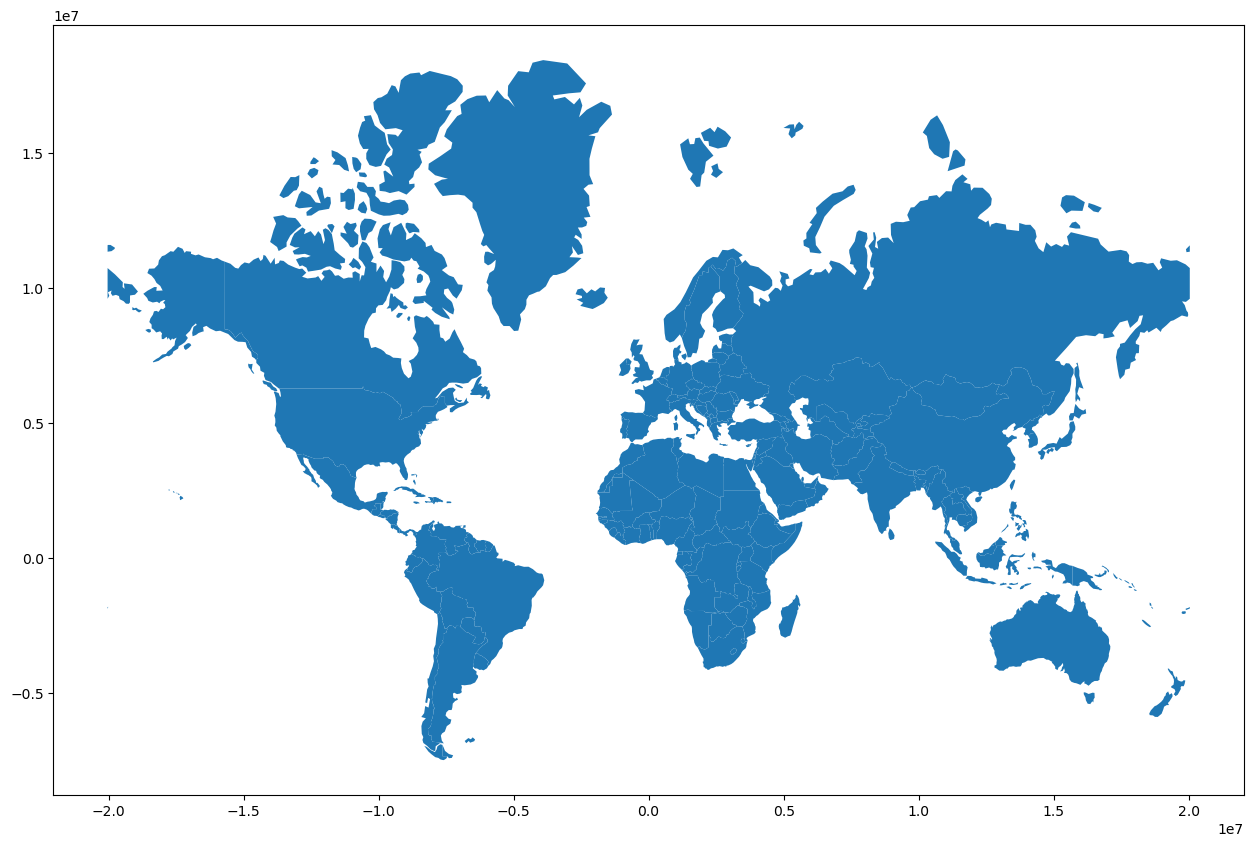

In [31]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# remove antartica or it breaks the map
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]

# create 10km x 10km box
df = gpd.GeoDataFrame([box(0, 0, 10e3, 10e3)], columns=['geometry'], crs='EPSG:3857')

fig, ax = plt.subplots(figsize=(20,10))

# display as web mercator
world.to_crs(epsg=3857).plot(ax=ax)
df.plot(ax=ax)

plt.show()

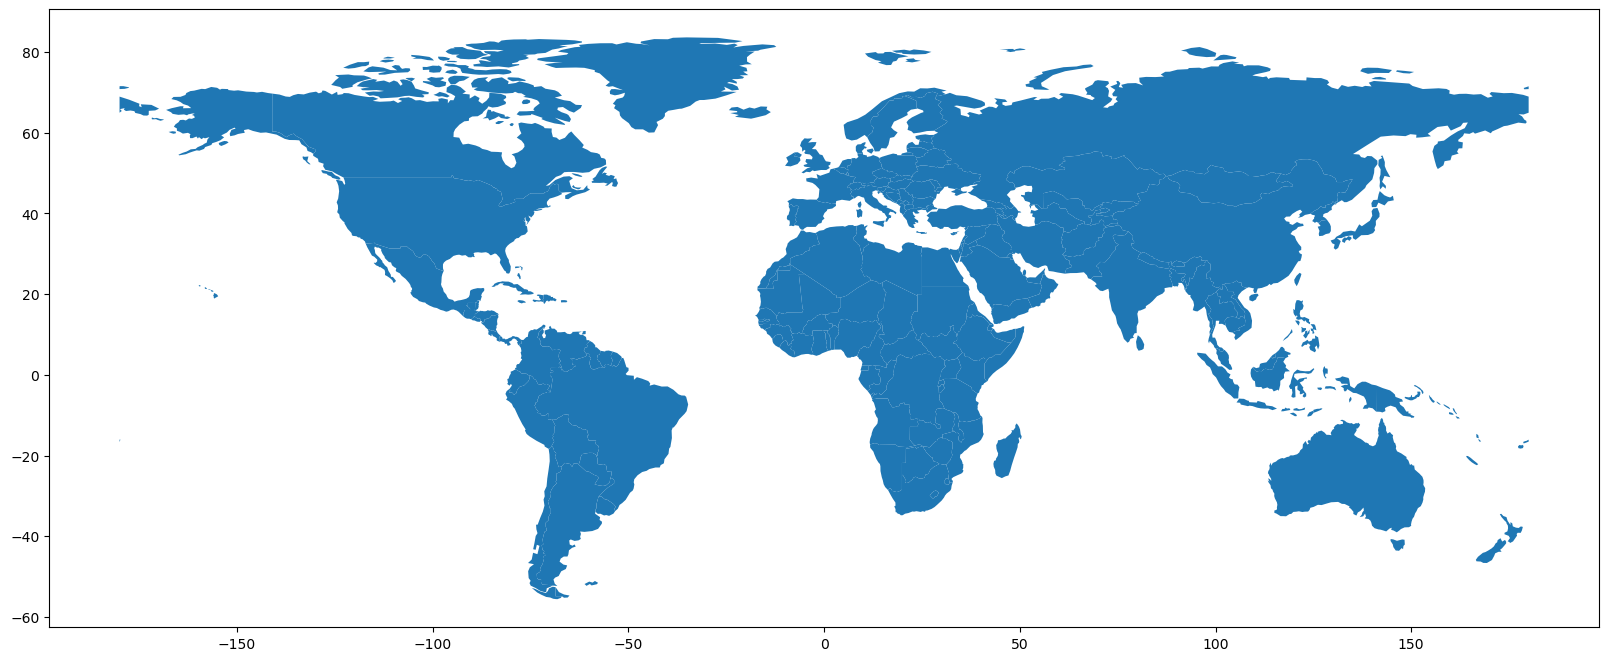

In [34]:
fig, ax = plt.subplots(figsize=(20,10))
world.to_crs(epsg=4326).plot(ax=ax)
plt.show()